# Telco Data Visualization

Nama: Alfia N. Rakhmatika

In [1]:
# Import libraries
import pandas as pd
import numpy as np 
import warnings

import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
# Read file
df = pd.read_csv('csv/telco_customer.csv')

# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [3]:
# Grouping data
dg = df.groupby('PaymentMethod').mean()['MonthlyCharges'].reset_index()

# Sort mean value descending
dg = dg.sort_values(by='MonthlyCharges', ascending=True).reset_index()

# Rename column
dg = dg.rename(columns={'MonthlyCharges':'Mean of Monthly Charges'})
dg

,index,PaymentMethod,Mean of Monthly Charges
0,3,Mailed check,43.917060
1,1,Credit card (automatic),66.512385
2,0,Bank transfer (automatic),67.192649
3,2,Electronic check,76.255814


Data visualization using bar chart to show the **comparison of monthly charges mean value per payment type**. User can easily see which payment type has the highest/lowest charges.<br>
<br>
Choose horizontal bar because the category labels are long string.

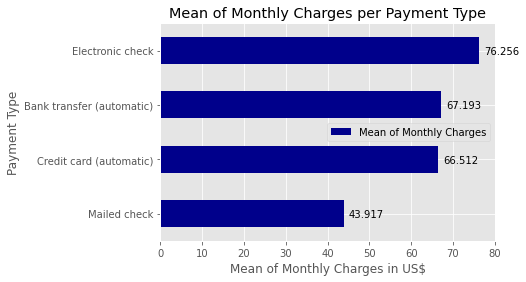

In [4]:
# Using pandas horizontal bar
ax = dg.plot(x='PaymentMethod', y='Mean of Monthly Charges', kind='barh', color='darkblue', title='Mean of Monthly Charges per Payment Type')

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

plt.xlabel('Mean of Monthly Charges in US$', fontsize = 12)
plt.ylabel('Payment Type', fontsize = 12)
warnings.filterwarnings("ignore")

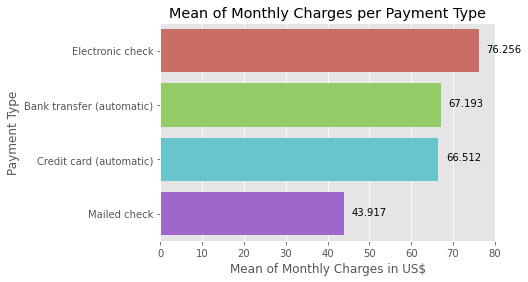

In [5]:
# Using seaborn
dg1 = dg.sort_values(by='Mean of Monthly Charges', ascending=False)
ax = sns.barplot(x='Mean of Monthly Charges', y='PaymentMethod', data=dg1, palette="hls")
ax.set_title('Mean of Monthly Charges per Payment Type')

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(25, -20), ha = 'center', va = 'center', textcoords='offset points')

plt.xlabel('Mean of Monthly Charges in US$', fontsize = 12)
plt.ylabel('Payment Type', fontsize = 12)
warnings.filterwarnings("ignore")

Jadi, dari plot di atas, dapat disimpulkan bahwa rata-rata pembayaran bulanan tertinggi customer adalah customer yang menggunakan pembayaran electronic check.

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 hari
- medium_tenure: User dengan tenure 21 - 40 hari
- high_tenure: User dengan tenure > 40 hari

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

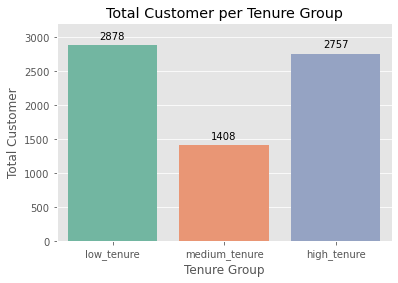

In [6]:
# Categorize customer using np.where
df['TenureGroup'] = np.where(df['tenure'] < 21, 'low_tenure', (np.where(df['tenure'] > 40, 'high_tenure', 'medium_tenure')))

# Calculate total customer per TenureGroup
tenure_group = df.groupby('TenureGroup')['customerID'].count().reset_index()

# Create order
tenure_group['order'] = np.where(tenure_group['TenureGroup'] == 'low_tenure', 1, 
                        (np.where(tenure_group['TenureGroup'] == 'medium_tenure', 2, 3)))

# Using seaborn
tenure_group = tenure_group.sort_values(by='order', ascending=True)
axtenure = sns.barplot(x='TenureGroup', y='customerID', data=tenure_group, palette="Set2")
axtenure.set_title('Total Customer per Tenure Group')

for p in axtenure.patches:
    axtenure.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel('Tenure Group', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)
axtenure.set(ylim=(0, 3200))
warnings.filterwarnings("ignore")

Jadi, dari plot di atas, kami menyimpulkan bahwa sebagian besar customer ada pada kategori low dan high tenure.

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



Based on Total Customer

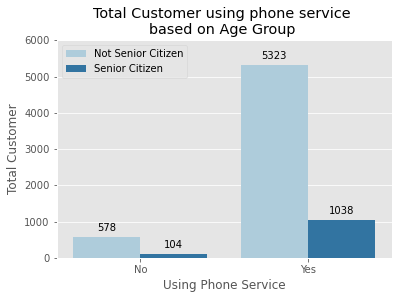

In [7]:
# Based on the total customer
seniorplot = sns.countplot(x='PhoneService', data=df, hue='SeniorCitizen', palette="Paired")
seniorplot.set_title('Total Customer using phone service \nbased on Age Group ')

for p in seniorplot.patches:
    seniorplot.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Change Legend Labels
legend_labels, _= seniorplot.get_legend_handles_labels()
seniorplot.legend(legend_labels, ['Not Senior Citizen','Senior Citizen'])

plt.xlabel('Using Phone Service', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)
seniorplot.set(ylim=(0, 6000))
warnings.filterwarnings("ignore")

Based on ratio using and not using Phone Service per age group 

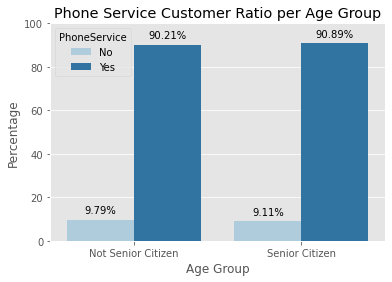

In [8]:
# Group data based on the Senior Citizen and Phone Service
senior = df.groupby(['PhoneService','SeniorCitizen'])['customerID'].count().reset_index()
senior['Percentage'] = senior['customerID']*100/senior.groupby('SeniorCitizen')['customerID'].transform(sum)

# Change Value
senior['SeniorCitizen'] = np.where(senior['SeniorCitizen'] == 0, 'Not Senior Citizen', 'Senior Citizen')
senior

# Plot ased on the ratio per age group 
seniorplot2 = sns.barplot(x='SeniorCitizen', y='Percentage', hue='PhoneService', data=senior, palette="Paired")

for p in seniorplot2.patches:
    seniorplot2.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Change x axis labels
seniorplot2.set(title='Phone Service Customer Ratio per Age Group', xlabel='Age Group', ylabel='Percentage')
seniorplot2.set(ylim=(0, 100))
warnings.filterwarnings("ignore")

Jadi, dari plot di atas, dapat disimpulkan bahwa tidak ada perbedaan signifikan antara rasio perbandingan pengguna Phone Service pada kategori Senior Citizen dan bukan Senior Citizen.<br>
Kebanyakan customer adalah pengguna Phone Service, baik pada kategori Senior Citizen maupun bukan Senior Citizen.

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

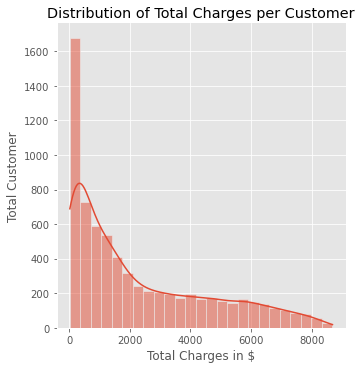

In [9]:
# Change Type
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Create plot
totalplot = sns.displot(data=df, x='TotalCharges',kde=True)

# Change axis labels
totalplot.set(title='Distribution of Total Charges per Customer', xlabel='Total Charges in $', ylabel='Total Customer')
warnings.filterwarnings("ignore")

Untuk membantu mendapatkan insight dari data Total Charges, dibuat boxplot per gender berikut.

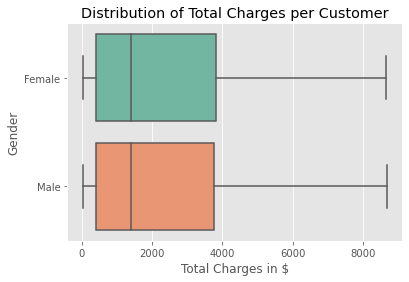

In [10]:
# Create plot
totalbox = sns.boxplot(x='TotalCharges', y='gender', data=df, palette='Set2')

# Change axis labels
totalbox.set(title='Distribution of Total Charges per Customer', xlabel='Total Charges in $', ylabel='Gender')
warnings.filterwarnings("ignore")

Jadi, dari plot di atas, dapat disimpulkan bahwa kebanyakan customer memiliki total charge pada kisaran 0 sampai 4000 dolar.

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

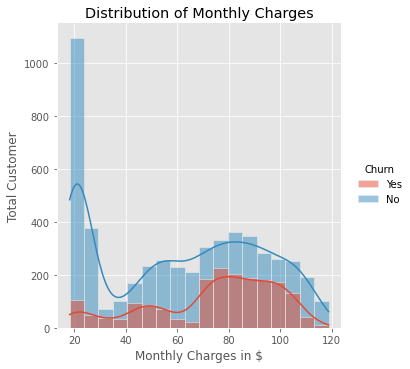

In [11]:
# Create plot
mc_churnplot = sns.displot(data=df, x='MonthlyCharges', hue='Churn',kde=True, hue_order=['Yes', 'No'])

# Change axis labels
mc_churnplot.set(title='Distribution of Monthly Charges', xlabel='Monthly Charges in $', ylabel='Total Customer')
warnings.filterwarnings("ignore")

Untuk membantu mendapatkan insight atas data monthly charges dan churn, dibuat boxplot berikut. 

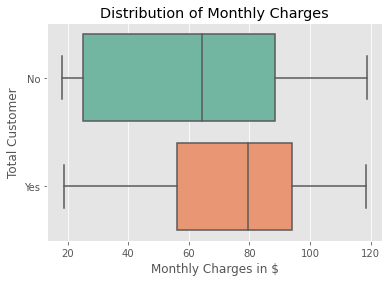

In [12]:
mc_churn = sns.boxplot(x='MonthlyCharges', y='Churn', data=df, palette='Set2')

# Change axis labels
mc_churn.set(title='Distribution of Monthly Charges', xlabel='Monthly Charges in $', ylabel='Total Customer')
warnings.filterwarnings("ignore")

Jadi, dari plot di atas, dapat disimpulkan bahwa customer yang memiliki monthly charges tinggi belum tentu memiliki kecenderungan churn, namun customer dengan monthly charge rendah cenderung tidak churn.

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

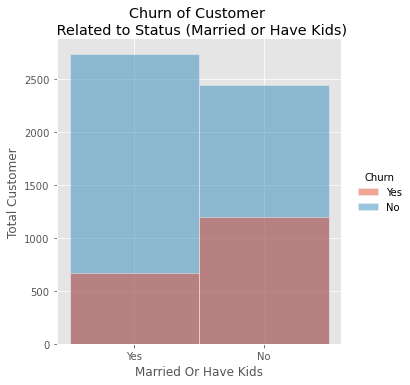

In [13]:
# Concat data Partner and Dependents
partner = df['Partner'].astype(str)
dependents = df['Dependents'].astype(str)
df['MarriedOrHaveKids'] = pd.concat([partner, dependents], ignore_index=True)

# Create plot
marriedkids = sns.displot(data=df, x='MarriedOrHaveKids', hue='Churn', hue_order=['Yes', 'No'] )

# Change axis labels
marriedkids.set(title='Churn of Customer \n Related to Status (Married or Have Kids)', xlabel='Married Or Have Kids', ylabel='Total Customer')
warnings.filterwarnings("ignore")

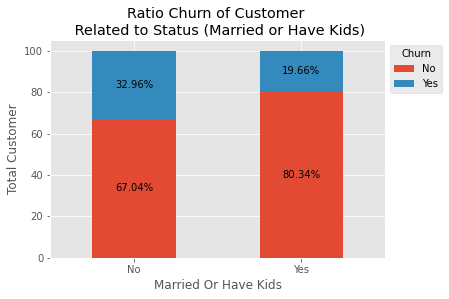

In [14]:
# Calculate ratio
marriedkids1 = df.groupby(['MarriedOrHaveKids', 'Churn'])['customerID'].count().reset_index()
marriedkids2 = df.groupby('MarriedOrHaveKids')['customerID'].count().reset_index()
marriedkidsgroup = marriedkids1.merge(marriedkids2, on='MarriedOrHaveKids', how='inner')
marriedkidsgroup['PercentagebyStatus'] = marriedkidsgroup['customerID_x']*100/marriedkidsgroup['customerID_y']
marriedkidsgroup.columns = ['MarriedOrHaveKids', 'Churn', 'CustomerChurnperStatus', 'CustomerperStatus', 'PercentagebyStatus']
marriedkidsgroupplot = marriedkidsgroup.pivot_table(index='MarriedOrHaveKids', columns='Churn', 
                       values='PercentagebyStatus')

# Create Plot
axmarriedkids = marriedkidsgroupplot.plot.bar(stacked=True)
for p in axmarriedkids.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axmarriedkids.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

axmarriedkids.set(title='Ratio Churn of Customer \n Related to Status (Married or Have Kids)', xlabel='Married Or Have Kids', ylabel='Total Customer')
plt.legend(bbox_to_anchor=(1, 1), title='Churn')
plt.xticks(rotation='horizontal')
warnings.filterwarnings("ignore")

Jadi, dari plot di atas, dapat disimpulkan bahwa customer yang memiliki partner atau dependent cenderung tidak churn.

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

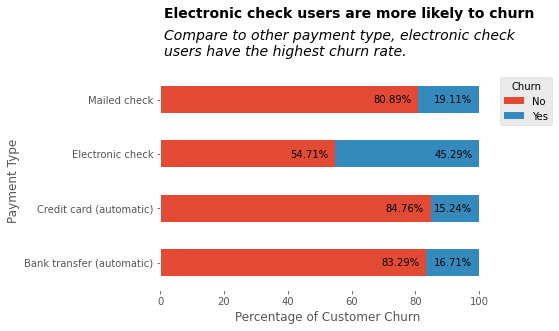

In [15]:
# Filter column
dftelco = df[['customerID','PaymentMethod', 'Churn']]

# Group by and Merge, to calculate ratio
dftelco1 = df.groupby(['PaymentMethod', 'Churn'])['customerID'].count().reset_index()
dftelco2 = df.groupby('PaymentMethod')['customerID'].count().reset_index()
dftelcomerge = dftelco1.merge(dftelco2, on= 'PaymentMethod', how='inner')
dftelcomerge.columns = ['PaymentMethod', 'Churn', 'CustomerPaymentandChurn', 'TotalCustomer']
dftelcomerge['Percentage'] = dftelcomerge['CustomerPaymentandChurn']*100/dftelcomerge['TotalCustomer']
dftelcoplot = dftelcomerge.pivot_table(index='PaymentMethod', columns='Churn', 
                       values='Percentage')

# Create Plot
axtelco = dftelcoplot.plot(kind='barh', stacked=True)

for p in axtelco.patches:
    axtelco.annotate('{:.2f}%'.format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(-45, 10), textcoords='offset points')

plt.legend(bbox_to_anchor=(1, 1), title='Churn')
plt.xlabel('Percentage of Customer Churn', fontsize = 12)
plt.ylabel('Payment Type', fontsize = 12)
axtelco.set_facecolor('white');

# Adding a title and a subtitle
plt.text(1, 4.5, 'Electronic check users are more likely to churn', fontweight='bold', fontsize=14)
plt.text(1, 3.8, 'Compare to other payment type, electronic check \nusers have the highest churn rate.', style = 'italic', fontsize=14)
warnings.filterwarnings("ignore")

In [16]:
dftelcomerge

,PaymentMethod,Churn,CustomerPaymentandChurn,TotalCustomer,Percentage
0,Bank transfer (automatic),No,1286,1544,83.290155
1,Bank transfer (automatic),Yes,258,1544,16.709845
2,Credit card (automatic),No,1290,1522,84.756899
3,Credit card (automatic),Yes,232,1522,15.243101
4,Electronic check,No,1294,2365,54.714588
5,Electronic check,Yes,1071,2365,45.285412
6,Mailed check,No,1304,1612,80.893300
7,Mailed check,Yes,308,1612,19.106700


In [17]:
dftelcoplot

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


END